In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, add, Flatten, Dense, DepthwiseConv2D


def PEPXModel(input_tensor, filters, name):
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'FP')(input_tensor)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Expansion')(x)
    x = DepthwiseConv2D(kernel_size=(3, 3), activation='relu', padding='same', name=name + 'DWConv3_3')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'SP')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Extension')(x)
    return x


def keras_model_build(input_size=(240,240, 3)):
    # input
    input = Input(shape=input_size, name='input')
    x = Conv2D(input_shape=input_size, filters=48, kernel_size=(7, 7), activation='relu', padding='same',
               strides=(1, 1))(input)
    x = MaxPool2D(pool_size=(2, 2))(x)
    # _Conv1x1
    x =Conv2D(filters=160, kernel_size=(1,1), activation= 'relu' ,name = "conv1x1160") (x) 
    # pepx1 
    pepx_11 = PEPXModel(x, 160, "pepx1.1")
    pexp_12 = PEPXModel(add([x,pepx_11]),160, "pepx1.2")
    pexp_13 = PEPXModel(add([x,pepx_11,pexp_12]),160, "pepx1.3")
    #conv1x1
    x = Conv2D(328,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x1328") (add([x,pepx_11,pexp_12,pexp_13]))
    #pepx2
    pepx_21 = PEPXModel(x, 328, "pepx21")
    pepx_22 = PEPXModel(add([x,pepx_21]), 328, "pepx22")
    pepx_23 = PEPXModel(add([x,pepx_21,pepx_22]), 328, "pepx23")
    pepx_24 = PEPXModel(add([x,pepx_21,pepx_22,pepx_23]), 328, "pepx24")
    #conv1x1 
    x = Conv2D(640,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x140") (add([x,pepx_21,pepx_22,pepx_23,pepx_24]))
    #pepx3
    pepx_31 = PEPXModel(x,640,'pepx31')
    pepx_32 = PEPXModel(add([x,pepx_31]),640,'pepx32')
    pepx_33 = PEPXModel(add([x,pepx_31,pepx_32]),640,'pepx33')
    pepx_34 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33]),640,'pepx34')
    pepx_35 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33,pepx_34]),640,'pepx35')
    pepx_36 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33,pepx_34,pepx_35]),640,'pepx36')
    #conv1x1 
    x = Conv2D(2048,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x12048") (add([x,pepx_31,pepx_32,pepx_33,pepx_34, pepx_35,pepx_36]))
    #pepx4
    pepx_41 = PEPXModel(x,2048,'pepx41')
    pepx_42 = PEPXModel(add([x,pepx_41]),2048,'pepx42')
    pepx_43 = PEPXModel(add([x,pepx_41,pepx_42]),2048,'pepx43')
    # FC
    fla = Flatten()(add([x,pepx_41,pepx_42,pepx_43]))
    d1 = Dense(256, activation='relu')(fla)
    d1 = Dense(128, activation='relu')(d1)
    output = Dense(3, activation='softmax')(d1)
    return keras.models.Model(input, output)

model = keras_model_build()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 240, 240, 48  7104        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 120, 120, 48  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
import numpy as np
import tensorflow as tf


src = "drive/MyDrive/"
x = np.load(src+"Fold-5/data-train-x-5.npy")
y = np.load(src+"Fold-5/data-train-y-5.npy")
model = keras_model_build()
# model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, batch_size=32, epochs=10)
model.save("drive/MyDrive/modelcnn/modelfold5.h5")



Epoch 1/10
109/109 [==============================] - 7481s 69s/step - loss: 0.6089 - accuracy: 0.7491
Epoch 2/10
109/109 [==============================] - 7522s 69s/step - loss: 0.3348 - accuracy: 0.8746
Epoch 3/10
109/109 [==============================] - 7519s 69s/step - loss: 0.2802 - accuracy: 0.8941
Epoch 4/10
109/109 [==============================] - 7339s 67s/step - loss: 0.2492 - accuracy: 0.9062
Epoch 5/10
109/109 [==============================] - 7489s 69s/step - loss: 0.2246 - accuracy: 0.9189
Epoch 6/10
109/109 [==============================] - 7612s 70s/step - loss: 0.1931 - accuracy: 0.9304
Epoch 7/10
109/109 [==============================] - 7824s 72s/step - loss: 0.1861 - accuracy: 0.9312
Epoch 8/10
109/109 [==============================] - 7741s 71s/step - loss: 0.1460 - accuracy: 0.9451
Epoch 9/10
109/109 [==============================] - 7746s 71s/step - loss: 0.1222 - accuracy: 0.9568
Epoch 10/10
109/109 [==============================] - 7774s 71s/step - l

In [2]:
import numpy as np
import tensorflow as tf

src = "drive/MyDrive/"
xt = np.load(src+"Fold-3/data-test-x-3.npy")
yt = np.load(src+"Fold-3/data-test-y-3.npy")


In [ ]:
import matplotlib.pyplot as plt
def conf_mat(conf_arr, title):
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure(figsize=(8,8))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    ax.set_title(title)
    ax.set_xlabel("Prediksi Class")
    ax.set_ylabel("Target Class")
    res = ax.imshow(np.array(norm_conf), cmap="Paired", 
                    interpolation='nearest')

    width, height = conf_arr.shape
    textcolors = ["w", "k"]
    for x in range(width):
        for y in range(height):
            ax.text(y, x, str(conf_arr[x][y]),
                    ha="center", va="center",
                    color=textcolors[0.2 < norm_conf[x][y] < 0.9],
                    fontsize=13,
                    weight='bold')

In [3]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import Sequential, Model, load_model
import time
mod_path2 = "drive/MyDrive/modelcnn/"

LABEL_NAMES = ["COVID","Normal","Pneumonia"]

target_test = np.argmax(yt,axis=1)

mod = load_model(mod_path2+"modelfold5.h5")
awal = time.time()
model = mod.predict(xt)
y_pred = np.argmax(model, axis=1)

print("Hasil K-Fold-5")

cls_report = classification_report(target_test, y_pred, target_names=LABEL_NAMES)

print (cls_report)

acc_score = accuracy_score(target_test, y_pred)
print (acc_score)

cm = confusion_matrix(target_test, y_pred)



print("F1-skor Keseluruhan")

precision = precision_score(target_test, y_pred, average='macro')
recall = recall_score(target_test, y_pred, average='macro')
f1_score = 2 * precision * recall / (precision + recall)
ahir = time.time()
waktu_testing = ahir-awal

print("Precision = ", precision)
print("Recall = ", recall)
print("F1 Score = ", f1_score)
print("waktu testing =",waktu_testing,"detik")

Hasil K-Fold-5
              precision    recall  f1-score   support

       COVID       0.93      0.97      0.95       300
      Normal       0.95      0.93      0.94       300
   Pneumonia       0.98      0.95      0.96       269

    accuracy                           0.95       869
   macro avg       0.95      0.95      0.95       869
weighted avg       0.95      0.95      0.95       869

0.9516685845799769
F1-skor Keseluruhan
Precision =  0.95298136223547
Recall =  0.951668731928955
F1 Score =  0.9523245947686021
waktu testing = 503.05211544036865 detik


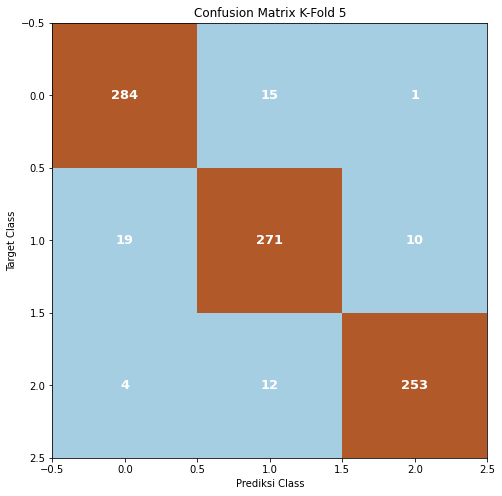

In [ ]:
conf_mat(cm, "Confusion Matrix K-Fold 5" )

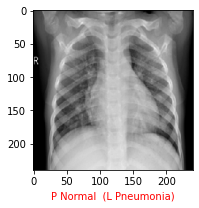

In [ ]:
import matplotlib.pyplot as plt
jumlah = 0
plt.figure(figsize=(20, 20))
plt.subplot(5, 6, 15)
for image, prediction, label in zip(xt, y_pred, target_test ):
  if prediction != label:
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel("P {}  (L {})".format(LABEL_NAMES[prediction],
                                LABEL_NAMES[label]),
                                color='red')

In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
y = label_binarize(target_test, classes=[0, 1, 2])
n_classes = y.shape[1]
print(n_classes)

3


In [4]:
def create_auc_roc(y_test_cat, y_pred_cat, title):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], model[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), model.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
            lw=lw, label='ROC curve (area = %0.3f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    print("nilai fpr =",fpr)
    print("nilai tpr =" ,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Specificity')
    plt.ylabel('Sensitivity')
    plt.title(title)
    plt.legend(loc="lower right")
    
    return roc_auc["micro"]

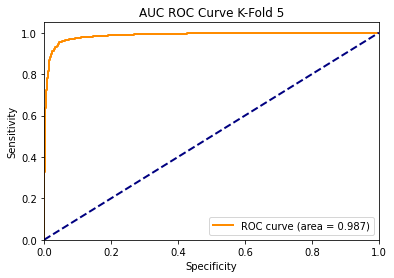

In [ ]:
 auc_score = create_auc_roc(yt, model, "AUC ROC Curve K-Fold 5" )



nilai fpr = {0: array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00175747, 0.00175747, 0.00351494,
       0.00351494, 0.00527241, 0.00527241, 0.00702988, 0.00702988,
       0.00878735, 0.00878735, 0.01054482, 0.01054482, 0.01230228,
       0.01230228, 0.01405975, 0.01405975, 0.01933216, 0.01933216,
       0.0228471 , 0.0228471 , 0.02460457, 0.02460457, 0.02987698,
       0.02987698, 0.03514938, 0.03514938, 0.03866432, 0.03866432,
       0.04393673, 0.04393673, 0.04920914, 0.04920914, 0.07557118,
       0.07557118, 0.07732865, 0.07732865, 0.0913884 , 0.0913884 ,
       0.1370826 , 0.1370826 , 0.82952548, 0.83304042, 1.        ]), 1: array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00175747, 0.00175747, 0.00351494,
       0.00351494, 0.00702988, 0.00702988, 0.00878735, 0.00878735,
       0.01054482, 0.01054482, 0.01230228

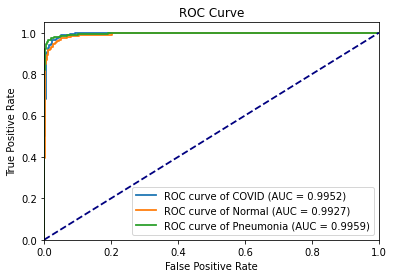

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

def show_roc_curve(y_test_cat, y_pred_prob, target, title):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:,i], y_pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  linewidth = 1.8
  plt.figure()
  plt.title(title)
  for i in range(3):
      plt.plot(fpr[i], tpr[i], lw=linewidth, label='ROC curve of %s (AUC = %0.4f)' % (LABEL_NAMES[i], roc_auc[i]))
  plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--')
  print("nilai fpr =",fpr)
  print("nilai tpr =" ,tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()

show_roc_curve(yt, model, target_test, 'ROC Curve')